# Como saber se um cogumelo é comestível?
## Feito por: 
**André Costa e Guilherme Aranha**

## Introdução
É senso comum que cogumelos podem ser uma boa fonte de proteina para alimentação, mas sempre quando encotramos um, nunca sabemos se é possivel come-lo ou se ele pode apresentar riscos a sua saude tendo algum tipo de veneno. Assim, decidimos encontrar alguma base de dados com vairos cogumelos catalogados com suas caracteristicas fisicas e tambem se ele possui veneno ou nao.

In [175]:
#todas as bibliotecas que vamos utilizar nesse notebook
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

*A base de dados que vamos utilizar foi encontrada no site Kraggle, sendo um arquivo csv com varios cogumelos catalogados
link:https://www.kaggle.com/uciml/mushroom-classification*

In [2]:
#importand a planilha 
data = pd.read_csv("mushrooms.csv") 
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Como podemos observar, a planilha esta escrita em ingles, e os elementos delas estao apenas com as iniciais de seu significado.
Assim, para poder facilitar a manipulação dos dados, decidimos mudar ela para portugues e escrever por inteiro seus elementos

In [3]:
data_clean = data

#alterando os titulos para portugues
colunas = {
    'class': 'tipo',
    'cap-shape': 'formato-do-chapeu',
    'cap-surface': 'superficie-do-chapeu',
    'cap-color': 'cor-do-chapeu',
    'bruises': 'marcas',
    'odor': 'cheiro',
    'gill-attachment': 'anexos-do-himenio',
    'gill-spacing': 'espacamento-do-himenio',
    'gill-size': 'tamanho-do-himenio',
    'gill-color': 'cor-do-himenio',
    'stalk-shape': 'formato-do-estipe',
    'stalk-root': 'raiz-do-estipe',
    'stalk-surface-above-ring': 'superficie-do-estipe-acima-do-anel',
    'stalk-surface-below-ring': 'superficie-do-estipe-abaixo-do-anel',
    'stalk-color-above-ring': 'cor-do-estipe-acima-do-anel',
    'stalk-color-below-ring': 'cor-do-estipe-abaixo-do-anel',
    'veil-type': 'tipo-do-veu',
    'veil-color': 'cor-do-veu',
    'ring-number': 'numero-de-aneis',
    'ring-type': 'tipo-do-anel',
    'spore-print-color': 'cor-da-esporada',
    'population': 'populacao',
    'habitat': 'habitat',
    }

data_clean = data_clean.rename(columns=colunas)

del data_clean['tipo-do-veu'] # <--- só tem um tipo, assim decidimos remover pois essa coluna nao agregaria nada no algoritmo

data_clean.head()

,tipo,formato-do-chapeu,superficie-do-chapeu,cor-do-chapeu,marcas,cheiro,anexos-do-himenio,espacamento-do-himenio,tamanho-do-himenio,cor-do-himenio,...,superficie-do-estipe-acima-do-anel,superficie-do-estipe-abaixo-do-anel,cor-do-estipe-acima-do-anel,cor-do-estipe-abaixo-do-anel,cor-do-veu,numero-de-aneis,tipo-do-anel,cor-da-esporada,populacao,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g


In [4]:
#alterando os valores para portugues
valores = {
    'tipo': {'p': 'venenoso','e': 'comestivel',},
    'formato-do-chapeu': {'x': 'convexo','b': 'sino','s': 'afundado','f': 'plano','k': 'nodoso','c': 'conico',},
    'superficie-do-chapeu': {'s': 'lisa','y': 'escamoso','f': 'fibroso','g': 'ranhuras',},
    'cor-do-chapeu': {'n': 'marrom','y': 'amarelo','w': 'branco','g': 'cinza','e': 'vermelho','p': 'rosa','b': 'couro','u': 'roxo','c': 'canela','r': 'verde',},
    'marcas': {'t': 'sim','f': 'nao',},
    'cheiro': {'p': 'pungente','a': 'almondega','l': 'anis','n': 'nenhum','f': 'fedorento','c': 'queimado','y': 'peixe','s': 'apimentado','m': 'mofo',},
    'anexos-do-himenio': {'f': 'sem','a': 'com',},
    'espacamento-do-himenio': {'c': 'medio','w': 'perto',},
    'tamanho-do-himenio': {'n': 'pequeno','b': 'grande',},
    'cor-do-himenio': {'k': 'preto','n': 'marrom','g': 'cinza','p': 'rosa','w': 'branco','h': 'chocolate','u': 'roxo','e': 'vermelho','b': 'couro','r': 'verde','y': 'amarelo','o': 'laranja',},
    'formato-do-estipe': {'e': 'alargando','t': 'afunilando',},
    'raiz-do-estipe': {'e': 'igual','c': 'bastao','b': 'bulbo','r': 'enraizado','?': 'faltando',},
    'superficie-do-estipe-acima-do-anel': {'s': 'lisa','f': 'fibrosa','k': 'sedosa','y': 'escamosa',},
    'superficie-do-estipe-abaixo-do-anel': {'s': 'lisa','f': 'fibrosa','y': 'escamosa','k': 'sedosa',},
    'cor-do-estipe-acima-do-anel': {'w': 'branco','g': 'cinza','p': 'rosa','n': 'marrom','b': 'couro','e': 'vermelho','o': 'laranja','c': 'canela','y': 'amarelo',},
    'cor-do-estipe-abaixo-do-anel': {'w': 'branco','p': 'rosa','g': 'cinza','b': 'couro','n': 'marrom','e': 'vermelho','y': 'amarelo','o': 'laranja','c': 'canela',},
    'cor-do-veu': {'w': 'branco','n': 'marrom','o': 'laranja','y': 'amarelo',},
    'numero-de-aneis': {'o': '1','t': '2','n': '0',},
    'tipo-do-anel': {'p': 'pingente','e': 'evanescente','l': 'largo','f': 'resplandecente','n': 'nenhum',},
    'cor-da-esporada': {'k': 'preto','n': 'marrom','u': 'roxo','h': 'chocolate','w': 'branco','r': 'verde','o': 'laranja','y': 'amarelo','b': 'couro',},
    'populacao': {'s': 'espalhado','n': 'numeroso','a': 'abundante','v': 'varios','y': 'solitario','c': 'agrupados',},
    'habitat': {'u': 'urbano','g': 'grama','m': 'prado','d': 'floresta','p': 'caminhos','w': 'lixo','l': 'folhas',}
}

data_clean = data_clean.replace(valores)
data_clean.head()

,tipo,formato-do-chapeu,superficie-do-chapeu,cor-do-chapeu,marcas,cheiro,anexos-do-himenio,espacamento-do-himenio,tamanho-do-himenio,cor-do-himenio,...,superficie-do-estipe-acima-do-anel,superficie-do-estipe-abaixo-do-anel,cor-do-estipe-acima-do-anel,cor-do-estipe-abaixo-do-anel,cor-do-veu,numero-de-aneis,tipo-do-anel,cor-da-esporada,populacao,habitat
0,venenoso,convexo,lisa,marrom,sim,pungente,sem,medio,pequeno,preto,...,lisa,lisa,branco,branco,branco,1,pingente,preto,espalhado,urbano
1,comestivel,convexo,lisa,amarelo,sim,almondega,sem,medio,grande,preto,...,lisa,lisa,branco,branco,branco,1,pingente,marrom,numeroso,grama
2,comestivel,sino,lisa,branco,sim,anis,sem,medio,grande,marrom,...,lisa,lisa,branco,branco,branco,1,pingente,marrom,numeroso,prado
3,venenoso,convexo,escamoso,branco,sim,pungente,sem,medio,pequeno,marrom,...,lisa,lisa,branco,branco,branco,1,pingente,preto,espalhado,urbano
4,comestivel,convexo,lisa,cinza,nao,nenhum,sem,perto,grande,preto,...,lisa,lisa,branco,branco,branco,1,evanescente,marrom,abundante,grama


Agora que a planilha ja esta organizada e em portugues, vamos checar se existe algum cogumelo com as mesmas caracteristicas

In [5]:
'Todos os cogumelos da lista: {} Cogumelos sem repetição: {}'.format(len(data_clean.index),len(data_clean.drop_duplicates().index))

'Todos os cogumelos da lista: 8124 Cogumelos sem repetição: 8124'

Bom com isso sabemos que nao existe nenhum cogumelo com as mesmas caracteristicas na lista, portanto, todos eles sao unicos.
Assim, seria possivel fazer uma boa previsao se ele seria comestivel ou venenoso ja que nao existe cogumelos com caracteristicas iguais e resultados diferentes (comestivel ou venenoso).
Agora vamos observar as porcentagem de cada caracteristica no nosso dataset:

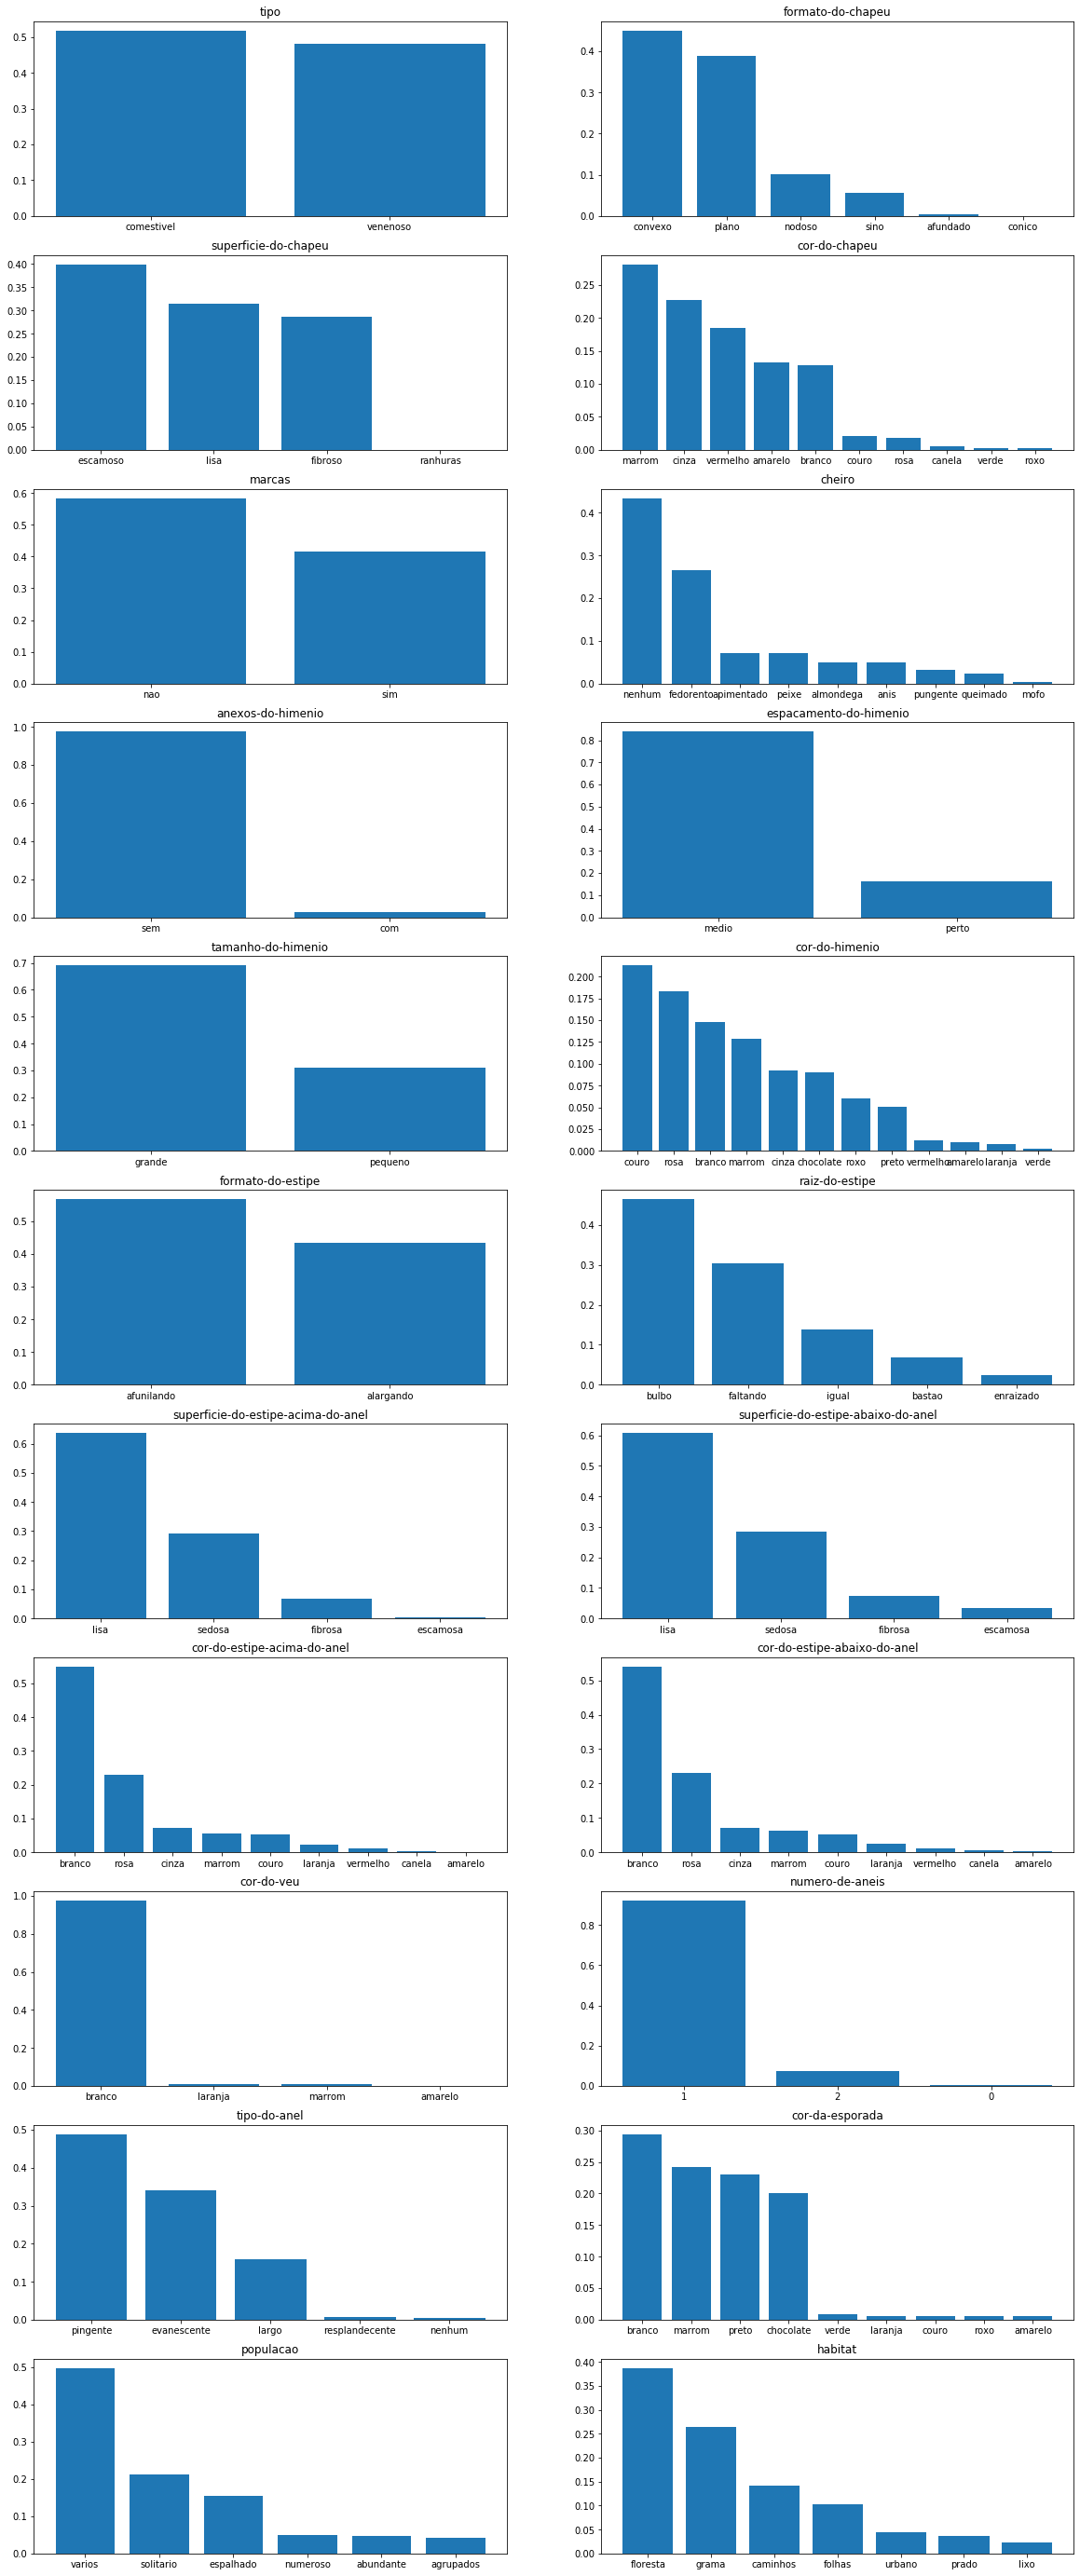

In [6]:
i = 0 #posição do subplot
f = plt.figure(figsize=(20, 50)) #tamanho do subplot
for coluna in data_clean:
    i += 1
    plot = f.add_subplot(11, 2, i)
    plot.bar(data_clean[coluna].value_counts().index,data_clean[coluna].value_counts(normalize=True))
    plt.title(coluna)
plt.show()


Com isso reparamos que a distribuição entre cogumelos venenosos e comestiveis muito proxima, o que vai nos ajudar nas proximas etapas do trabalho pois esta bem equilibrado. Tambem reparamos que dentro de uma dominio, existem algumas caracteristicas que dominam como por exemplo a grande maioria dos cogumelos possuem anexos do himenio.
Vamos observar a distribuição entre cogumelos venenosos e comestiveis mais claramente:


In [7]:
data_clean['tipo'].value_counts(normalize=True)

comestivel    0.517971
venenoso      0.482029
Name: tipo, dtype: float64

Assim, sabemos que nosso modelo previsivel deve ter uma taxa de acerto maior que 52%, ja que caso foi menor que isso, nosso modelo pode ser descartado.

Vamos invetigar agora a porcentagem de cogumelos venenosos e comestiveis por característica:

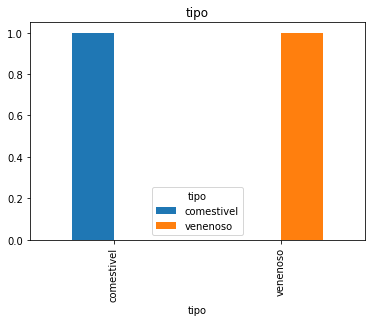

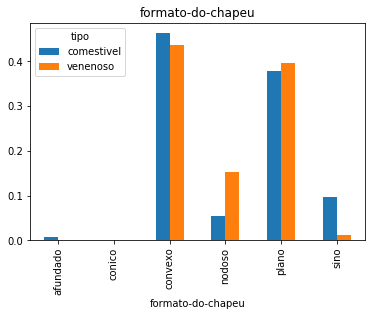

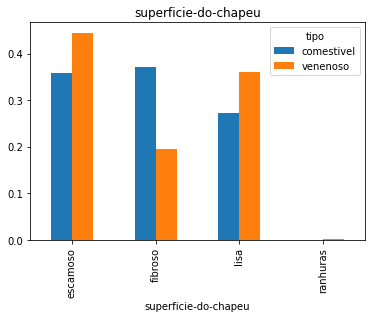

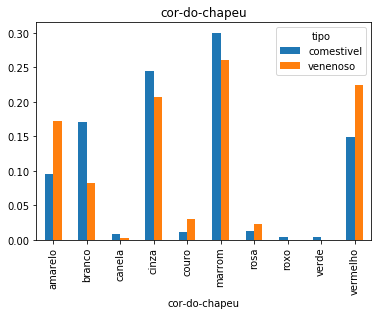

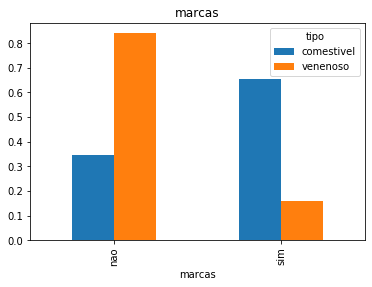

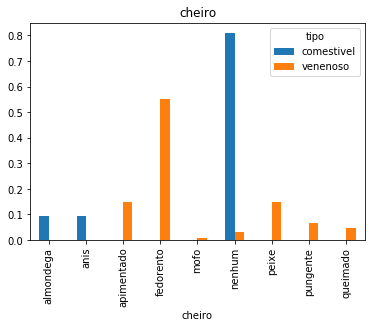

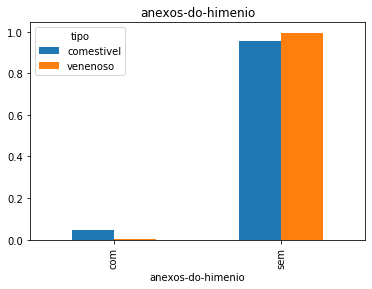

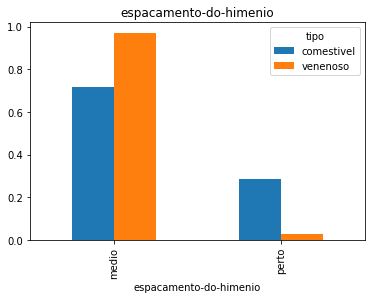

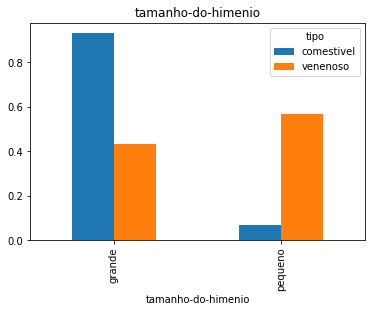

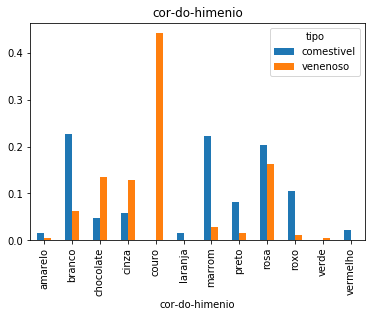

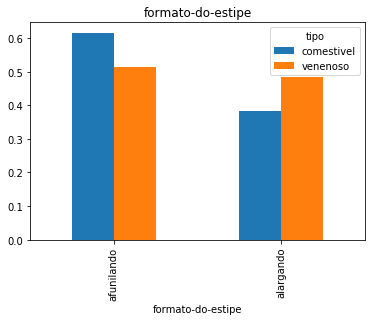

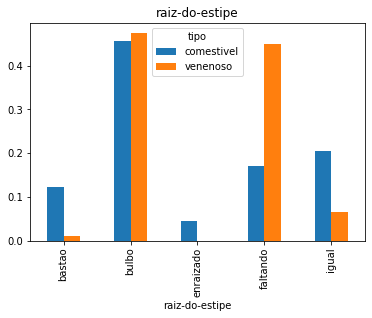

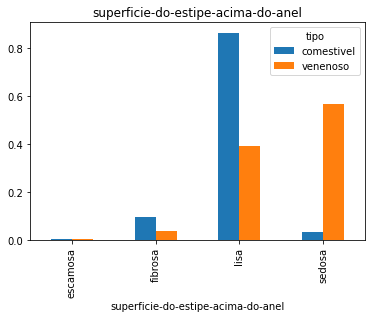

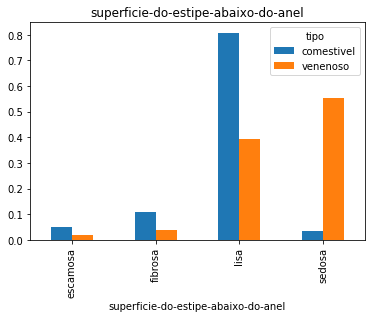

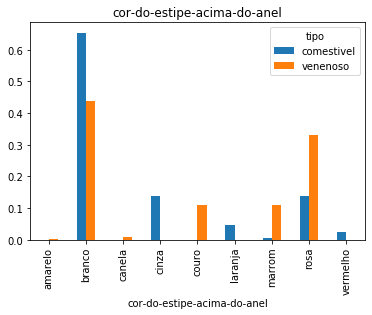

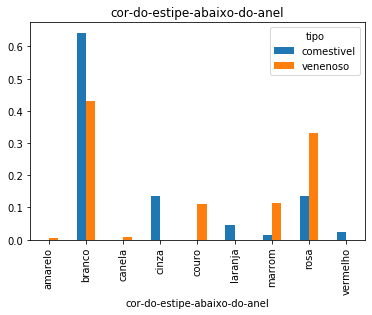

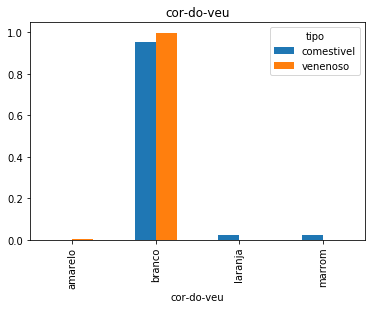

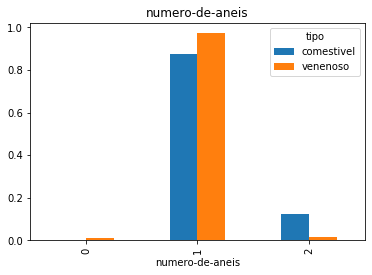

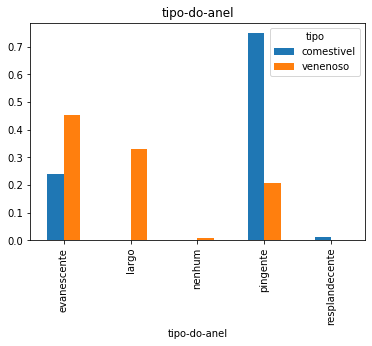

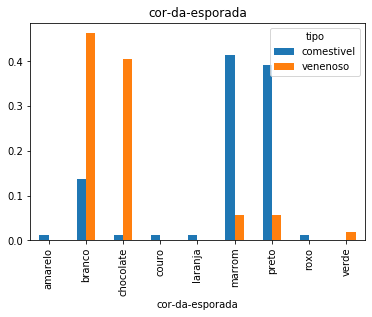

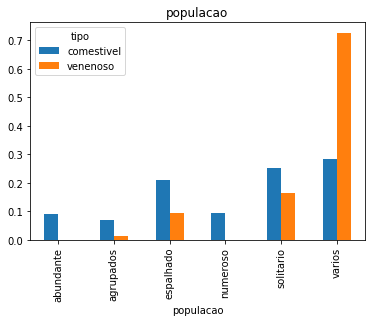

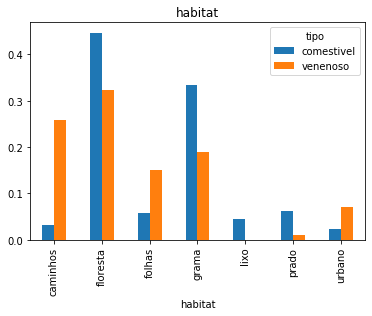

In [35]:
i = 0 #posição do subplot
for coluna in data_clean:
    i += 1 
    pd.crosstab(index=data_clean[coluna], columns=data_clean['tipo'], normalize='columns').plot.bar()
    plt.title(coluna)
plt.show()

Concluimos a partir desses graficos que existem várias características diretamente relacionadas ao tipo de cogumelo. Chama expecial atenção o cheiro: se o cogumelo tiver algum cheiro, é possivel identificar se ele é venenoso a partir apenas dessa característica

Para criar nosso modelo, decidimos por fazer uma regressao logistica. Assim precisamos transformar todas nossas variaveis que sao qualitativas em quantitativas com ajuda da função get_dummies do pandas.

In [19]:
data_clean_dummies = pd.get_dummies(data_clean)

In [113]:
data_clean_dummies.head()

,tipo_comestivel,tipo_venenoso,formato-do-chapeu_afundado,formato-do-chapeu_conico,formato-do-chapeu_convexo,formato-do-chapeu_nodoso,formato-do-chapeu_plano,formato-do-chapeu_sino,superficie-do-chapeu_escamoso,superficie-do-chapeu_fibroso,...,populacao_numeroso,populacao_solitario,populacao_varios,habitat_caminhos,habitat_floresta,habitat_folhas,habitat_grama,habitat_lixo,habitat_prado,habitat_urbano
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
3,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Como nossas variaveis ja estao no formato quantitavo para poder realizar a regressao logistica, separamos nossos dados em 2 datasets com o intuito de usar um deles para treinar nosso modelo e outro para verificar a proeficiencia do nosso modelo.

In [171]:
razao = 0.6
corte = int(razao*data_clean_dummies.shape[0])
data_treino = data_clean_dummies.iloc[:corte,:]
data_teste = data_clean_dummies.iloc[corte:,:]

In [172]:
X_treino = data_treino.drop(columns=["tipo_comestivel", "tipo_venenoso"])
y_treino = data_treino['tipo_comestivel']
X_teste = data_teste.drop(columns=["tipo_comestivel", "tipo_venenoso"])
y_teste = data_teste['tipo_comestivel']

In [173]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_treino, y_treino)

ypred = model.predict(X_teste)

In [174]:
acertos,erros = 0,0
for a, b in list(zip(ypred, y_teste)):
    if a == b:
        acertos += 1
    else:
        erros += 1
f"acertos: {acertos} // erros: {erros} // %: {acertos/(acertos + erros)*100}"

'acertos: 3132 // erros: 118 // %: 96.36923076923077'

Pelos resultados, nosso modelo superou seu benchmark (que seria a porcentagem de cogumelos comestiveis na base de dados), acertando 96% das vezes. 